In [2]:
import pandas as pd
import numpy as np

# **READING DATA USING PANDAS**

We use *read_csv* function to read the data file in python and Pandas *Dataframe *method to convert datafile into Dataframe

In [4]:
df=pd.DataFrame(pd.read_csv('train.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

## HANDLING NULL VALUES

The data set may contain many rows and columns for which some values are missing , to deal with them we have two options :
 
 1. Either drop the entire row or column.
 2. Fill the missing values with some appropriate value , let's say mean of all the values for that column will do the job.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
drop_col=df.isnull().sum()[df.isnull().sum()>(35/100*df.shape[0])]
drop_col
drop_col.index

Index(['Cabin'], dtype='object')

The column "Cabin" should be dropped begin irrevelant to any sort of statistical analysis for titanic survivors.

In [8]:
df.drop(drop_col.index,axis=1,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
df.dropna(axis=0,how='any',inplace=True)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [13]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


In [ ]:
#Creation of a new column "FamilySize" , combining the two columns "SiSp" and "Parch"

In [14]:
df["FamilySize"]=df["SibSp"]+df["Parch"]
df.drop(['SibSp','Parch'],axis=1,inplace=True)
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'FamilySize']


In [17]:
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005028,-0.035330,0.030300,0.012703,-0.040258
Survived,-0.005028,1.000000,-0.335549,-0.074673,0.255290,0.018277
Pclass,-0.035330,-0.335549,1.000000,-0.327954,-0.548193,0.064221
Age,0.030300,-0.074673,-0.327954,1.000000,0.088604,-0.247546
Fare,0.012703,0.255290,-0.548193,0.088604,1.000000,0.218658
FamilySize,-0.040258,0.018277,0.064221,-0.247546,0.218658,1.000000


Clearly , family size in the ship does not have much correlation with the survival rate . To check whether the person being Alone or not affects survival rate. We'll create a new column "Alone".

In [19]:
df['Alone']=[0 if df['FamilySize'][i]>0 else 1 for i in df.index]
print(df[['FamilySize','Alone']])

     FamilySize  Alone
0             1      0
1             1      0
2             0      1
3             1      0
4             0      1
..          ...    ...
886           0      1
887           0      1
888           3      0
889           0      1
890           0      1

[889 rows x 2 columns]


In [20]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.300935
Name: Survived, dtype: float64

Clearly , if the person is alone then he/she has less chance of surviving

In [21]:
df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.274079
Fare,-0.274079,1.000000


In [31]:
df['Age'].describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13f02cff50>,
      dtype=object)

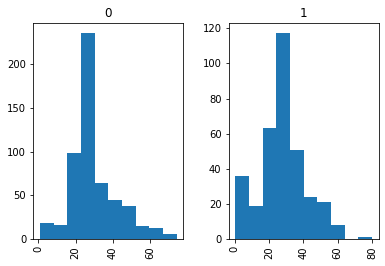

In [30]:
df.hist(column='Age',by='Survived')

In [22]:
df['Sex']=[0 if df['Sex'][i]=='male' else 1 for i in df.index]
//1 for female and 0 for male

In [24]:
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.740385
Name: Survived, dtype: float64

Clearly , Female passengers have more chance of surviving than male passengers.

In [35]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

### **Conclusions**:

1.Female passengers were prioritized over men.


2.People in rich class have higher survival rates implying hierarchy might have been followed while saving the passengers even though they were low in number.

3.Passengers travelling with their family were prioritized as they have higher survival rates.

4.Passengers who boarded ship at Cheroburg survived more in proportion to others.

5.Most of the people in the ship were of the 15-25 age group , most deaths occured from people in this age group.

6.More than 50% population drowned to death.
